# Customer Churn in Financial Customer


Churned Customers are those who have decided to end their relationship with their 
existing banking organizations. Churned Customers means a direct loss of Marketing 
Acquisition Cost and possible revenue which could be capitalized post sale. Hence, 
predicting possible customers who can churn beforehand can help us save this loss.

Dataset Description
Input Attributes
1. Customer ID : Unique identification number
2. Surname : Family name
3. Credit score : Banking organization use the credit score to determine the potential 
risk of lending to a customer. The lenders make use of these scores to fix the credit 
limit for all eligible customer.
4. Geography : Country of the customer
5. Gender : Male/Female
6. Age 
7. Tenure : Tenure is the pre-agreed time period (in years) between the lender and 
borrower, for the borrower to repay the principal and interest in full to the lender.
8. Balance : Account balance
9. No of products : Number of services taken by the customer.
10. Has Credit Card : Yes/No
11. Is active member : Yes/No
12. Estimated salary : Salary of the customer
Target / Class Attribute : Exited : Churned/Retained

# Importing the basic libaries to start with understanding the dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('ChurnDataF.csv')

In [3]:
df.head(10)

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [4]:
df.shape

(10000, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


In [6]:
df.dtypes

CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [7]:
df.describe

<bound method NDFrame.describe of       CustomerId    Surname  CreditScore Geography  Gender  Age  Tenure  \
0       15634602   Hargrave          619    France  Female   42       2   
1       15647311       Hill          608     Spain  Female   41       1   
2       15619304       Onio          502    France  Female   42       8   
3       15701354       Boni          699    France  Female   39       1   
4       15737888   Mitchell          850     Spain  Female   43       2   
...          ...        ...          ...       ...     ...  ...     ...   
9995    15606229   Obijiaku          771    France    Male   39       5   
9996    15569892  Johnstone          516    France    Male   35      10   
9997    15584532        Liu          709    France  Female   36       7   
9998    15682355  Sabbatini          772   Germany    Male   42       3   
9999    15628319     Walker          792    France  Female   28       4   

        Balance  NumOfProducts  HasCrCard  IsActiveMember  Estima

# Data Preprocessing

In [8]:
df.isnull().sum()

CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [9]:
df.nunique()

CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

# Processing

In [10]:
df = df.drop(['CustomerId'], axis=1 )

In [11]:
df

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [12]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

# EDA

<Axes: title={'center': 'Frequency Distribution Of Exited'}>

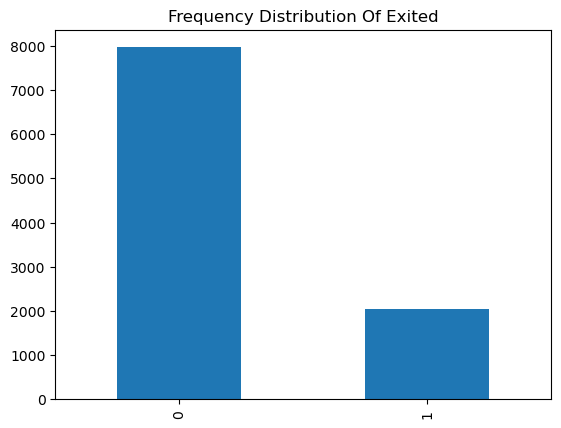

In [13]:
df['Exited'].value_counts().plot(kind='bar',y='value_column',title='Frequency Distribution Of Exited')

# the ratio of customer churned and retained

In [14]:
churn_count = df['Exited'].sum()
retained_count = df.shape[0] - churn_count
churn_ratio = churn_count/ df.shape[0]
retained_ratio = retained_count/ df.shape[0]


In [15]:
churn_ratio

0.2037

In [16]:
retained_ratio

0.7963

# Visualize the ratio

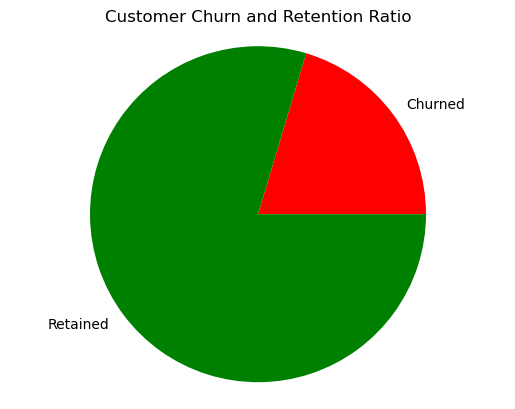

In [17]:
labels = ['Churned', 'Retained']
ratios = [churn_ratio, retained_ratio]
colors = ['red', 'green']

plt.pie(ratios, labels=labels, colors=colors)
plt.axis('equal') 
plt.title('Customer Churn and Retention Ratio')
plt.show()

<Axes: title={'center': 'Frequency Distribution Of Geography'}>

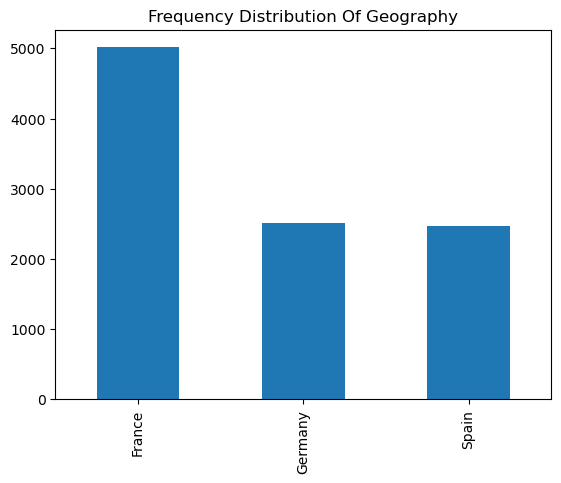

In [18]:
# Graphical representation of the geography using bar chart
df['Geography'].value_counts().plot(kind='bar',y='value_column',title='Frequency Distribution Of Geography')

<Axes: title={'center': 'Frequency Distribution Of Gender'}>

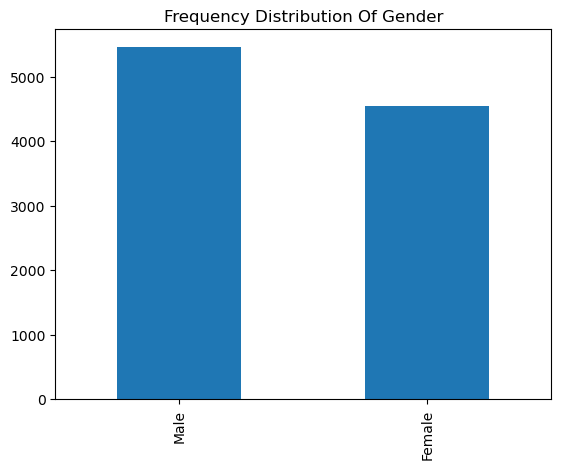

In [19]:
# Graphical representation of the gender using bar chart
df['Gender'].value_counts().plot(kind='bar',y='value_column',title='Frequency Distribution Of Gender')

In [20]:
df = df.drop(['Surname'] , axis=1)

In [21]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


# Outlier

<Axes: >

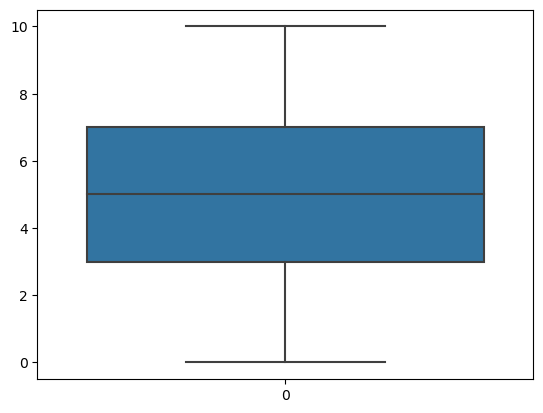

In [22]:
#Detection of outliers in tenure
sns.boxplot(df['Tenure'])

<Axes: >

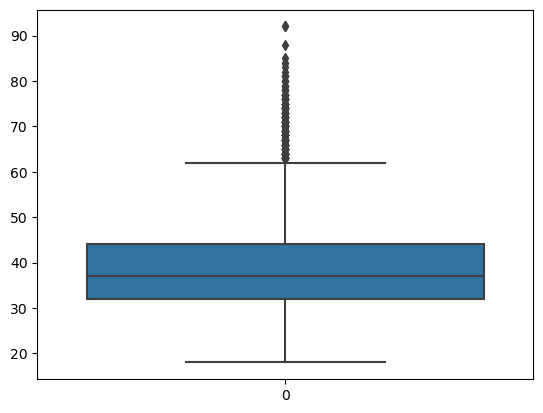

In [23]:
#Detection of outliers in Age
sns.boxplot(df['Age'])

<Axes: >

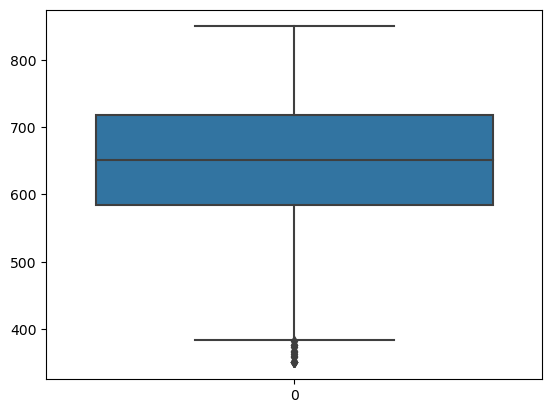

In [24]:
# Detection of outliers in credit score
sns.boxplot(df['CreditScore'])

# The relation between the target and the rest of the variables

Text(0.5, 1.0, 'Effect of Gender on Exited ')

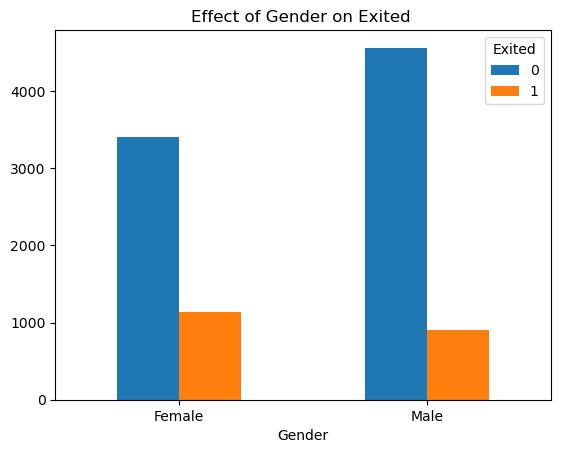

In [25]:
## Graphical representation of Gender against Exited
cross_tab = pd.crosstab(df["Gender"],df["Exited"])
cross_tab.plot.bar(rot=0)
plt.title("Effect of Gender on Exited ")

Text(0.5, 1.0, 'Effect of Has CreditCard on Exited')

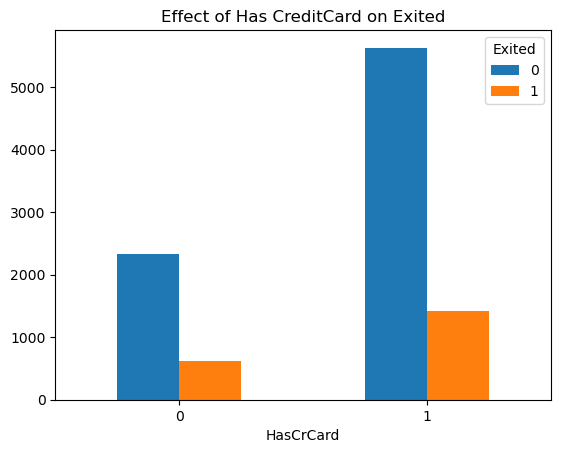

In [26]:
## Graphical representation of Creditcard against Exited
cross_tab = pd.crosstab(df['HasCrCard'],df['Exited'])
cross_tab.plot.bar(rot=0)
plt.title("Effect of Has CreditCard on Exited")

Text(0.5, 1.0, 'Effect of isActivemember on Exited')

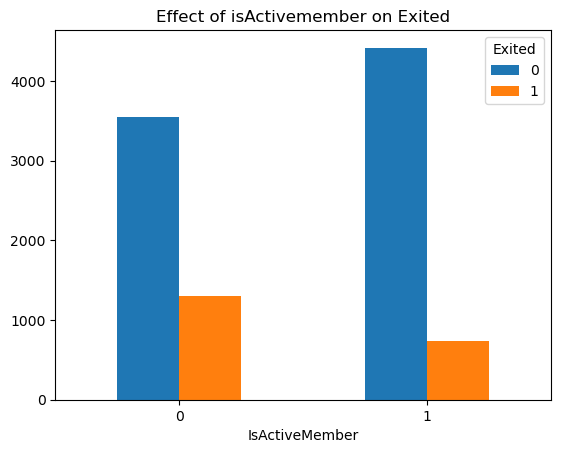

In [27]:
## Graphical representation of ActiveMember against Exited
cross_tab = pd.crosstab(df['IsActiveMember'],df['Exited'])
cross_tab.plot.bar(rot=0)
plt.title("Effect of isActivemember on Exited")

Text(0.5, 1.0, 'Effect of NumOfProducts on Exited')

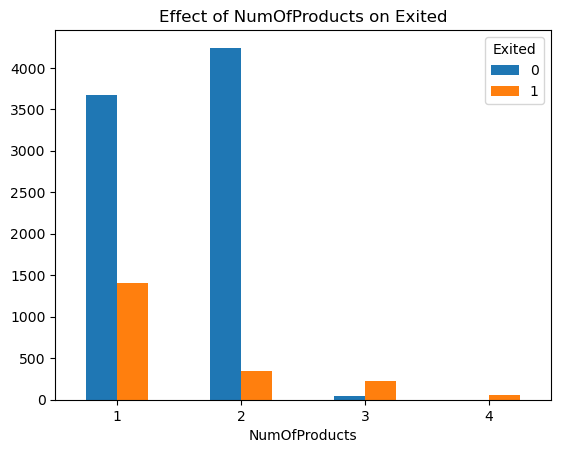

In [28]:
## Graphical representation of ActiveMember against Exited
cross_tab = pd.crosstab(df['NumOfProducts'],df['Exited'])
cross_tab.plot.bar(rot=0)
plt.title("Effect of NumOfProducts on Exited")

Text(0.5, 1.0, 'Effect of Tenure on Exited')

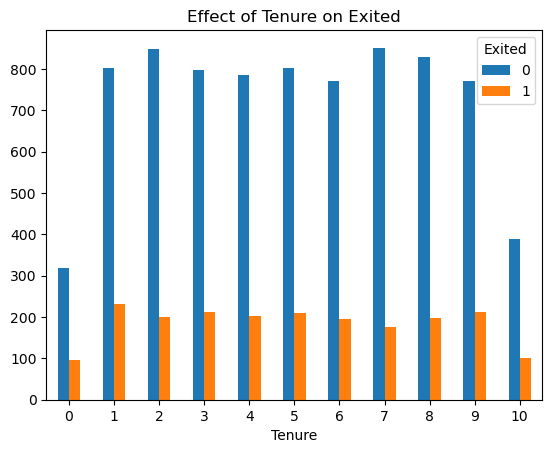

In [29]:
## Graphical representation of Tenure against Exited
cross_tab = pd.crosstab(df['Tenure'],df['Exited'])
cross_tab.plot.bar(rot=0)
plt.title("Effect of Tenure on Exited")

# For Continous Data

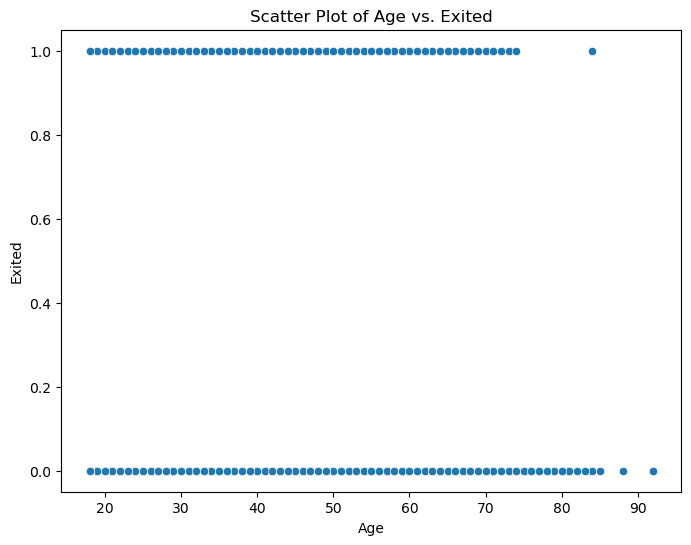

In [30]:
#Scatter plot for age on exited

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='Exited', data=df)
plt.title("Scatter Plot of Age vs. Exited")
plt.xlabel("Age")
plt.ylabel("Exited")
plt.show()

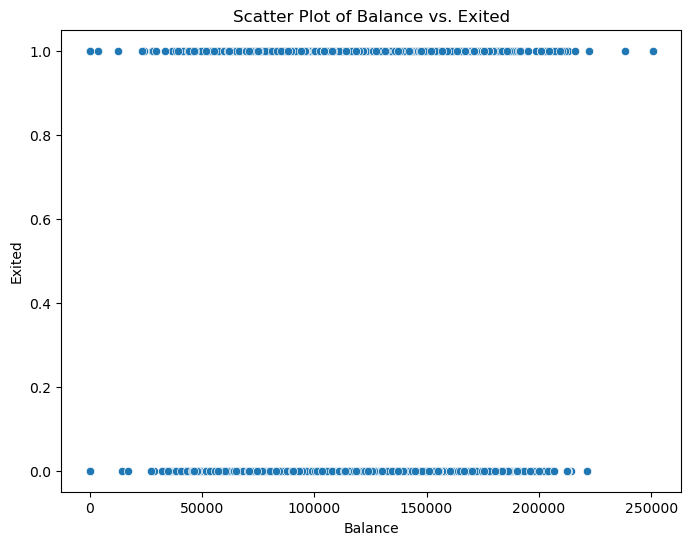

In [31]:
#Scatter plot for balance on exited
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Balance', y='Exited', data=df)
plt.title("Scatter Plot of Balance vs. Exited")
plt.xlabel("Balance")
plt.ylabel("Exited")
plt.show()

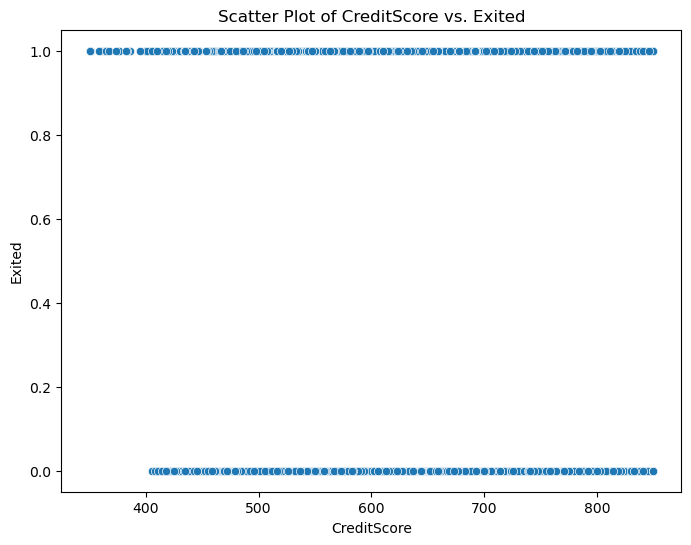

In [32]:
#Scatter plot of credit score vs exited
plt.figure(figsize=(8, 6))
sns.scatterplot(x='CreditScore', y='Exited', data=df)
plt.title("Scatter Plot of CreditScore vs. Exited")
plt.xlabel("CreditScore")
plt.ylabel("Exited")
plt.show()

In [33]:
data = df.copy()
data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


# Converting the Categorical data into Numerical Data

Before making a predictive model we need to change the categorial data into numerical data


Geography


Gender

In [34]:
from sklearn.preprocessing import LabelEncoder

In [35]:
# Converting categorical columns to numerical columns
encoder = LabelEncoder()
df["Gender"] = encoder.fit_transform(df["Gender"])
df["Geography"] = encoder.fit_transform(df["Geography"])

In [36]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [37]:
# Converting categorical columns to numerical columns
encoder = LabelEncoder()
data["Gender"] = encoder.fit_transform(data["Gender"])
data["Geography"] = encoder.fit_transform(data["Geography"])

In [38]:
data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,39,5,0.00,2,1,0,96270.64,0
9996,516,0,1,35,10,57369.61,1,1,1,101699.77,0
9997,709,0,0,36,7,0.00,1,0,1,42085.58,1
9998,772,1,1,42,3,75075.31,2,1,0,92888.52,1


# Model Training

Train and Test Splitting

In [39]:
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [40]:
"""
# initialize X as features and y as target
X = df.drop(['Exited'], axis=1).values
y = df['Exited'].values

# split the data into train and test sets with a test size of 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=21)
"""

"\n# initialize X as features and y as target\nX = df.drop(['Exited'], axis=1).values\ny = df['Exited'].values\n\n# split the data into train and test sets with a test size of 20%\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=21)\n"

In [41]:
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier


rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
#  k-fold cross-validation
kfold = KFold(n_splits=10, shuffle=True, random_state=42)
X = df.drop(columns=['Exited'])
y = df['Exited']


# Perform k-fold cross-validation and calculate the accuracy for each fold
accuracy_scores = cross_val_score(rf_classifier, X, y, cv=kfold, scoring='accuracy')

# Print the accuracy for each fold and the average accuracy
for fold, accuracy in enumerate(accuracy_scores, start=1):
    print(f"Fold {fold}: Accuracy = {accuracy:.4f}")

print(f"Average Accuracy: {accuracy_scores.mean():.4f}")

Fold 1: Accuracy = 0.8640
Fold 2: Accuracy = 0.8640
Fold 3: Accuracy = 0.8670
Fold 4: Accuracy = 0.8500
Fold 5: Accuracy = 0.8520
Fold 6: Accuracy = 0.8670
Fold 7: Accuracy = 0.8710
Fold 8: Accuracy = 0.8540
Fold 9: Accuracy = 0.8540
Fold 10: Accuracy = 0.8580
Average Accuracy: 0.8601


Using Random Forest to train the model with KFold validation

Splitting the data into 10 and training them and final Average accuracy is printed.

In [42]:
""""
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_predict
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Assuming 'Churn' is the target variable and 'Gender' is a categorical feature
X = df.drop(columns=['Exited'])
y = df['Exited']

# the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

#  k-fold cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Lists to store evaluation metrics for each fold
accuracy_scores = []
confusion_matrices = []

# Perform k-fold cross-validation
for train_index, test_index in kfold.split(X):
    X_trainn, X_testt = X.iloc[train_index], X.iloc[test_index]
    y_trainn, y_testt = Y.iloc[train_index], Y.iloc[test_index]

    # Fit the classifier on the training data
    rf_classifier.fit(X_trainn, y_trainn)

    # Make predictions on the test data
    y_pred = rf_classifier.predict(X_testt)

    #print y_pred
    print(y_pred)
    
    
    # Calculate and store evaluation metrics for each fold
    accuracy_scores.append(accuracy_score(y_test, y_pred))
    
    confusion_matrices.append(confusion_matrix(y_test, y_pred))

# Calculate the average accuracy and confusion matrix over all folds
average_accuracy = sum(accuracy_scores) / len(accuracy_scores)
average_confusion_matrix = sum(confusion_matrices)

print("Average Accuracy:", average_accuracy)
print("Average Confusion Matrix:")
print(average_confusion_matrix)

# Fit the model on the entire dataset for deployment
rf_classifier.fit(X, y)
"""
# Now, you can use the trained model to make predictions on new data
# For example, use rf_classifier.predict(new_data) where new_data is the new data to predict churn.


NameError: name 'Y' is not defined

In [51]:

import pandas as pd
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_predict
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# k-fold cross-validation
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

# Lists to store evaluation metrics for each fold
accuracy_scores = []
#accuracy_scoress = []
confusion_matrices = []

# Perform k-fold cross-validation
for train_index, test_index in kfold.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Fit the classifier on the training data
    rf_classifier.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = rf_classifier.predict(X_test)

    # Make predictions on the training data
    y_predd = rf_classifier.predict(X_train)
    
    #accuracy_scoress.append(accuracy_score(y_test, y_predd))
    # Calculate and store evaluation metrics for each fold
    accuracy_scores.append(accuracy_score(y_test, y_pred))
    confusion_matrices.append(confusion_matrix(y_test, y_pred))
    

# Calculate the average accuracy and confusion matrix over all folds

#average_accuracyy = sum(accuracy_scoress) / len(accuracy_scoress)
average_accuracy = sum(accuracy_scores) / len(accuracy_scores)
average_confusion_matrix = sum(confusion_matrices)

print("Average Accuracy Test:", average_accuracy)
#print("Average Accuracy Train:", average_accuracyy)
print("Average Confusion Matrix:")
print(average_confusion_matrix)

# Fit the model on the entire dataset for deployment
rf_classifier.fit(X, y)

Average Accuracy Test: 0.8601000000000001
Average Confusion Matrix:
[[7664  299]
 [1100  937]]


RandomForestClassifier(random_state=42)

In [58]:
# calculate metric evaluation and confusion matrix
from sklearn.metrics import recall_score, f1_score, roc_auc_score,confusion_matrix
recall = recall_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

In [59]:
print("Recall       :", recall)
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred))

Recall       : 0.47058823529411764
ROC-AUC Score: 0.7139373337274609


# Building a predictive system

In [52]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [53]:
# create a dataframe to store the predictions and concatenate the predictions with the original train dataframe
predictions = pd.DataFrame({'Prediction': rf_classifier.predict(df.drop('Exited', axis=1))})
result = pd.concat([predictions, df], axis=1).rename(columns={'Exited': 'Actual', 'Prediction': 'Predicted'})

# select the desired columns for the result DataFrame
columns = ['Actual', 'Predicted', 'CreditScore','Geography','Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
           'HasCrCard', 'IsActiveMember', 'EstimatedSalary']
result = result[columns]

# map the numerical labels to their corresponding Churn status
result['Exited (Actual)'] = result['Actual'].map({1: 'Churn', 0: 'Retain'})
result['Exited (Predicted)'] = result['Predicted'].map({1: 'Churn', 0: 'Retain'})

result.head()

,Actual,Predicted,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited (Actual),Exited (Predicted)
0,1,1,619,0,0,42,2,0.00,1,1,1,101348.88,Churn,Churn
1,0,0,608,2,0,41,1,83807.86,1,0,1,112542.58,Retain,Retain
2,1,1,502,0,0,42,8,159660.80,3,1,0,113931.57,Churn,Churn
3,0,0,699,0,0,39,1,0.00,2,0,0,93826.63,Retain,Retain
4,0,0,850,2,0,43,2,125510.82,1,1,1,79084.10,Retain,Retain


In [55]:
# create a dataframe to store the predictions and concatenate the predictions with the original train dataframe
predictions = pd.DataFrame({'Prediction': rf_classifier.predict(data.drop('Exited', axis=1))})
results = pd.concat([predictions, data], axis=1).rename(columns={'Exited': 'Actual', 'Prediction': 'Predicted'})

# select the desired columns for the result DataFrame
columns = ['Actual', 'Predicted', 'CreditScore','Geography','Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
           'HasCrCard', 'IsActiveMember', 'EstimatedSalary']
results = result[columns]

# map the numerical labels to their corresponding Churn status
results['Exited (Actual)'] = results['Actual'].map({1: 'Churn', 0: 'Retain'})
results['Exited (Predicted)'] = results['Predicted'].map({1: 'Churn', 0: 'Retain'})

results.head()

C:\Users\ARUNIMA\AppData\Local\Temp\ipykernel_3900\2474665725.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results['Exited (Actual)'] = results['Actual'].map({1: 'Churn', 0: 'Retain'})


,Actual,Predicted,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited (Actual),Exited (Predicted)
0,1,1,619,0,0,42,2,0.00,1,1,1,101348.88,Churn,Churn
1,0,0,608,2,0,41,1,83807.86,1,0,1,112542.58,Retain,Retain
2,1,1,502,0,0,42,8,159660.80,3,1,0,113931.57,Churn,Churn
3,0,0,699,0,0,39,1,0.00,2,0,0,93826.63,Retain,Retain
4,0,0,850,2,0,43,2,125510.82,1,1,1,79084.10,Retain,Retain


In [49]:
# export data to csv file
result.to_csv('result.csv', index=False)


In [56]:
results.to_csv('results.csv', index=False)